In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Generate synthetic data
data = {
    'Timestamp': [datetime(2024, 6, 1, 8, 0, 0) + timedelta(seconds=i) for i in range(6)],
    'Speed (km/h)': [45, 46, 44, 42, 48, 47],
    'Acceleration (m/s²)': [0.5, 0.6, -0.4, -0.6, 0.8, -0.2],
    'Steering Angle (degrees)': [0, -2, 1, 3, -1, 0],
    'Brake Status (0/1)': [0, 0, 1, 1, 0, 0],
    'LIDAR Distance (m)': [30, 29, 28, 27, 31, 32],
    'Lane Deviation (m)': [0.1, 0.05, 0.2, 0.3, 0, 0.1],
    'Automated (0/1)': [1, 1, 0, 0, 1, 1],
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('automated_driving_data.csv', index=False)


In [ ]:
df=pd.read_csv('automated_driving_data.csv')

In [ ]:
df.head()

,Timestamp,Speed (km/h),Acceleration (m/s²),Steering Angle (degrees),Brake Status (0/1),LIDAR Distance (m),Lane Deviation (m),Automated (0/1)
0,2024-06-01 08:00:00,45,0.5,0,0,30,0.10,1
1,2024-06-01 08:00:01,46,0.6,-2,0,29,0.05,1
2,2024-06-01 08:00:02,44,-0.4,1,1,28,0.20,0
3,2024-06-01 08:00:03,42,-0.6,3,1,27,0.30,0
4,2024-06-01 08:00:04,48,0.8,-1,0,31,0.00,1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense

# Load the data
data = pd.read_csv('automated_driving_data.csv')

# Split features and labels
X = data.drop(['Timestamp', 'Automated (0/1)'], axis=1).values
y = data['Automated (0/1)'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.6922 - accuracy: 0.7500 - val_loss: 0.6915 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 69ms/step - loss: 0.6901 - accuracy: 0.7500 - val_loss: 0.6901 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 47ms/step - loss: 0.6879 - accuracy: 0.7500 - val_loss: 0.6885 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 48ms/step - loss: 0.6855 - accuracy: 0.7500 - val_loss: 0.6867 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 64ms/step - loss: 0.6829 - accuracy: 0.7500 - val_loss: 0.6846 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 48ms/step - loss: 0.6802 - accuracy: 0.7500 - val_loss: 0.6822 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 65ms/step - loss: 0.6771 - accuracy: 0.7500 - val_loss: 0.6794 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=============

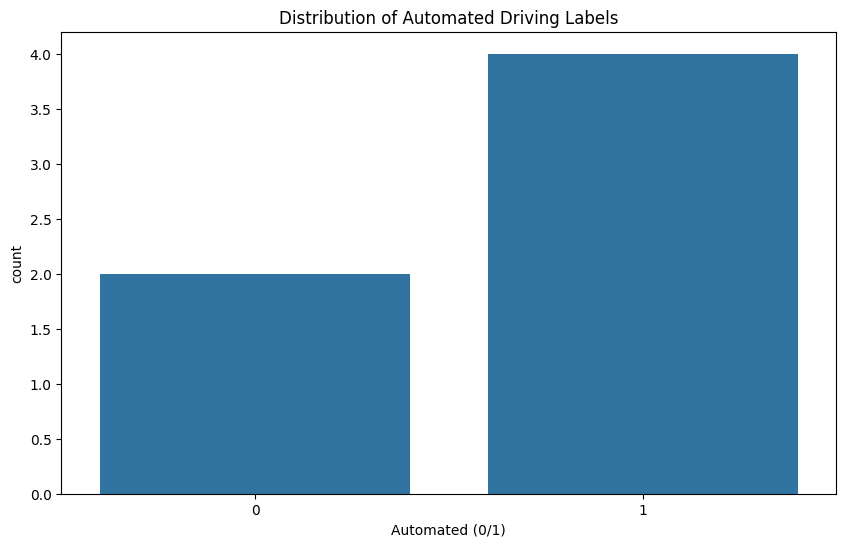

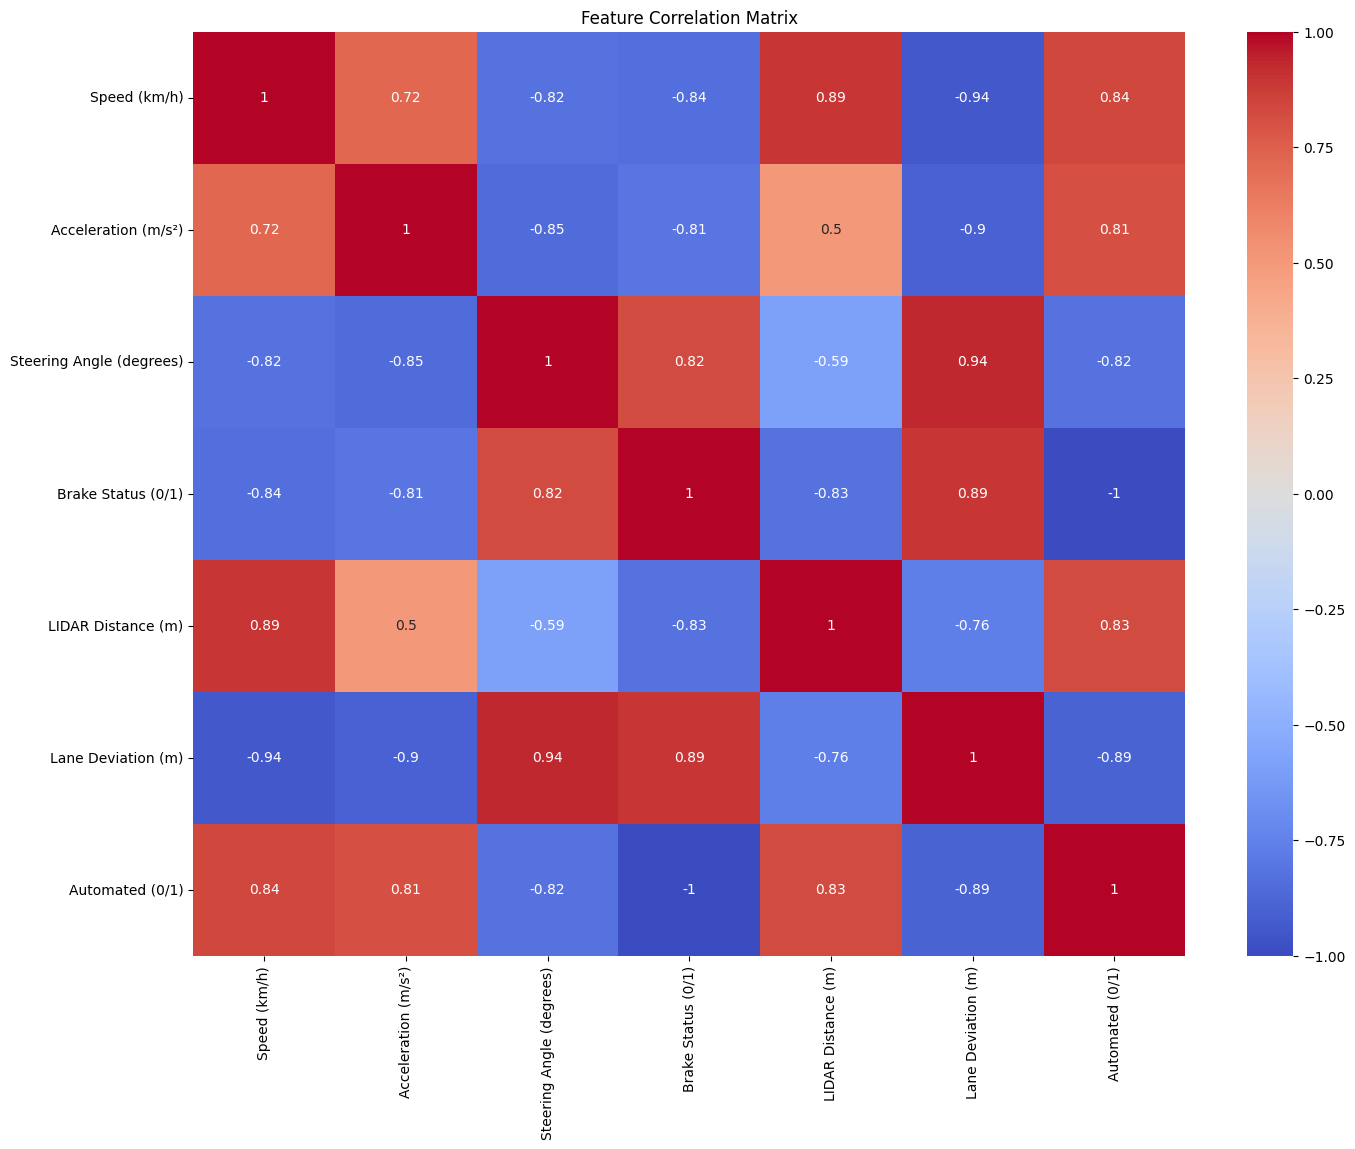

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.6924 - accuracy: 0.7500 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 77ms/step - loss: 0.6899 - accuracy: 1.0000 - val_loss: 0.6888 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 83ms/step - loss: 0.6873 - accuracy: 1.0000 - val_loss: 0.6867 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 91ms/step - loss: 0.6846 - accuracy: 1.0000 - val_loss: 0.6842 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 68ms/step - loss: 0.6818 - accuracy: 1.0000 - val_loss: 0.6815 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 96ms/step - loss: 0.6788 - accuracy: 1.0000 - val_loss: 0.6784 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 68ms/step - loss: 0.6755 - accuracy: 1.0000 - val_loss: 0.6751 - val_accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 80ms/step - loss: 0.6720 - accuracy: 1.0000 - val_loss: 0.6715 - val_accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 76ms/step - loss: 0.6680 - accuracy: 1.0000 - val_loss: 0.6677 - val_accuracy: 1.0000
Epoch 10/10
1/1 [=====================

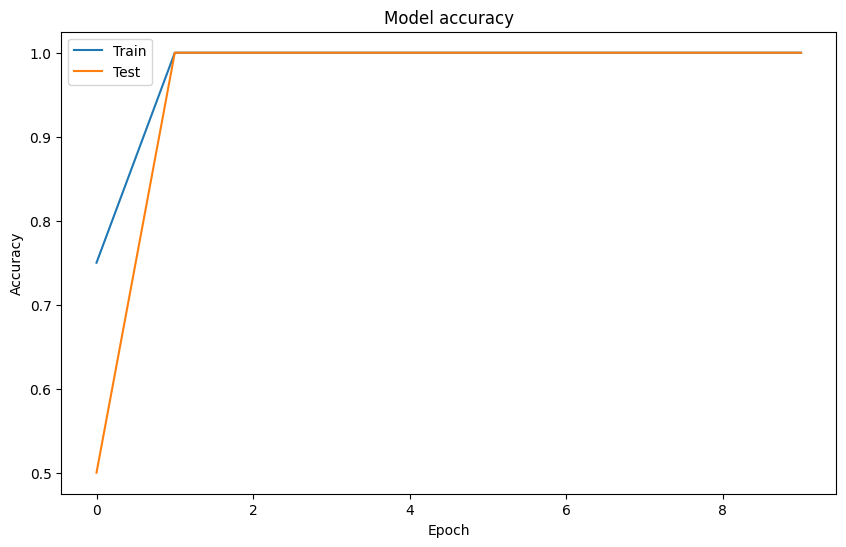

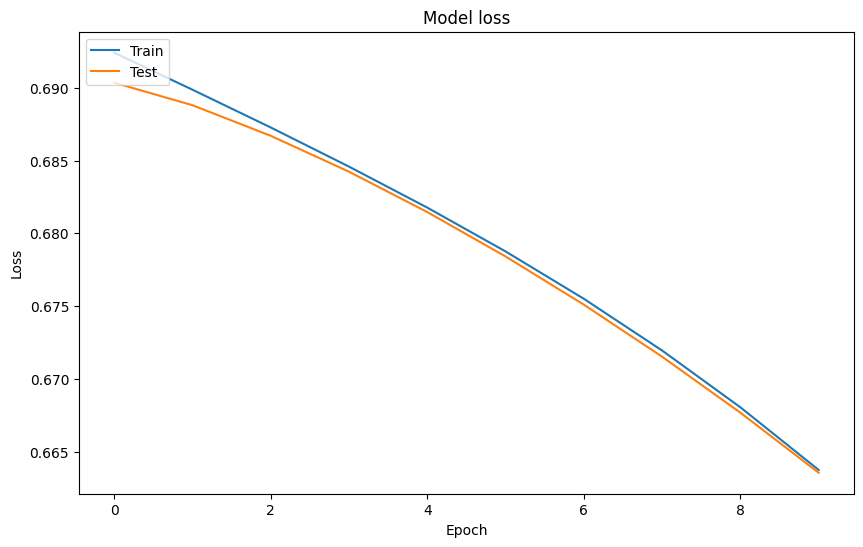

1/1 [==============================] - 1s 1s/step


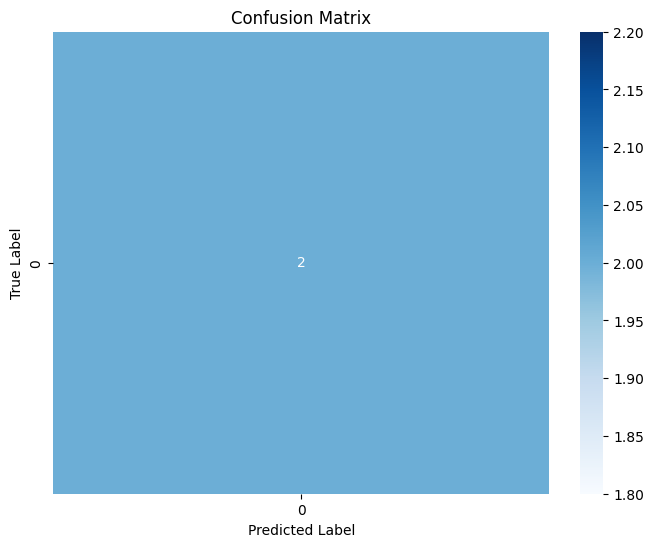

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


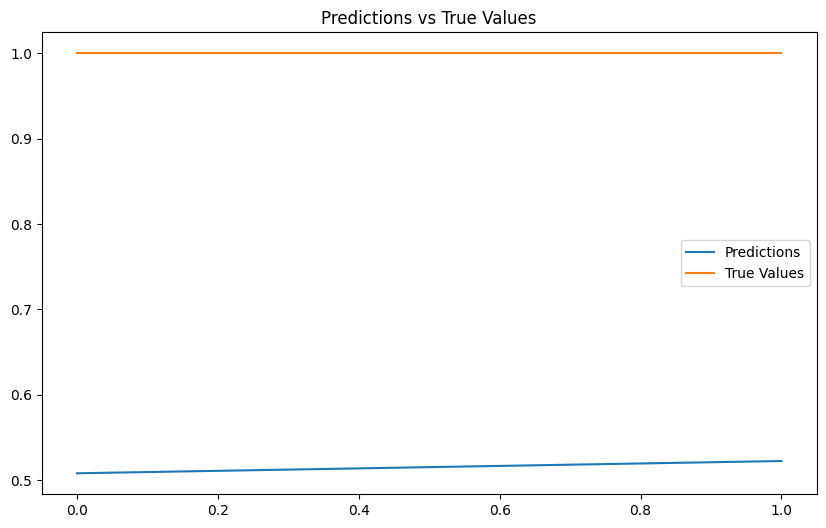

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import ModelCheckpoint

# Load the data
data = pd.read_csv('automated_driving_data.csv')

# Data Visualization
def visualize_data(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Automated (0/1)', data=data)
    plt.title('Distribution of Automated Driving Labels')
    plt.show()

    # Exclude non-numeric columns for correlation matrix
    numeric_data = data.select_dtypes(include=[np.number])

    plt.figure(figsize=(16, 12))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()

visualize_data(data)

# Split features and labels
X = data.drop(['Timestamp', 'Automated (0/1)'], axis=1).values
y = data['Automated (0/1)'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Checkpoint to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Save the trained model
model.save('automated_driving_model.h5')

# Predictions on Test Data
predictions = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='True Values')
plt.title('Predictions vs True Values')
plt.legend()
plt.show()
